# Analysis of denaturation experiment

This experiment addressed the question of whether denaturation of the telomere DNA affected its radius of gyration. Two separate slides of HeLa L telomeres were IF labeled with Cy5 and imaged both before and after the denaturation step. The analysis routine was then applied to both datasets to see if the radius of gyration distributions changed significantly.

In [1]:
# Initialize the environment
%pylab
%matplotlib inline
import pandas as pd

import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# Set global matplotlib settings
journalFontSize = 16
fontpath = '/usr/share/fonts/truetype/msttcorefonts/Arial.ttf'
prop = font_manager.FontProperties(fname = fontpath)
rcParams['font.family'] = prop.get_name()
rcParams.update({'font.size'       : journalFontSize})
rcParams.update({'legend.fontsize' : journalFontSize})
rcParams.update({'axes.titlesize'  : journalFontSize})

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the distributions into memory
control   = pd.read_csv('Rg_Control.csv',   header = None)
denatured = pd.read_csv('Rg_Denatured.csv', header = None)

# Rename columns
control.columns   = ['Control Rg']
denatured.columns = ['Denatured Rg']

## Statistics of the radius of gyration

In [3]:
control.describe()

,Control Rg
count,447.000000
mean,95.417206
std,22.679070
min,36.235000
25%,79.804000
50%,93.149000
75%,106.260000
max,200.730000


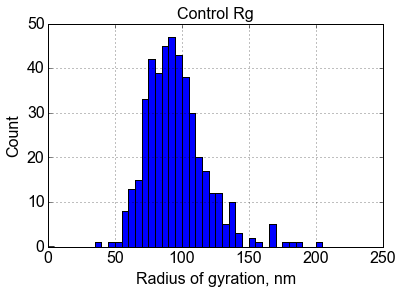

In [4]:
myBins = np.arange(0, 250, 5)
control.hist(bins = myBins)
plt.xlabel('Radius of gyration, nm')
plt.ylabel('Count')
plt.show()

In [5]:
denatured.describe()

,Denatured Rg
count,391.000000
mean,94.016228
std,20.214971
min,48.395000
25%,80.331500
50%,92.953000
75%,105.205000
max,171.730000


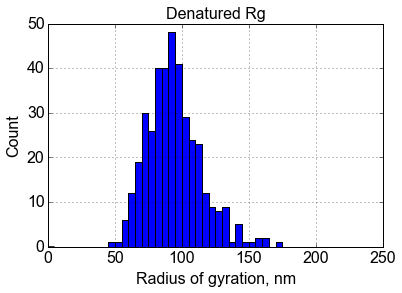

In [6]:
myBins = np.arange(0, 250, 5)
denatured.hist(bins = myBins)
plt.xlabel('Radius of gyration, nm')
plt.ylabel('Count')
plt.show()

### Show both histograms on top of one another

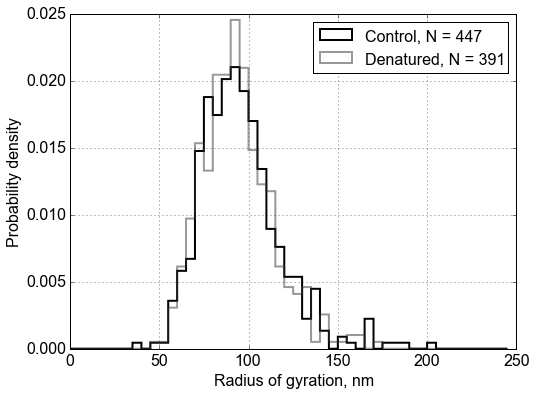

In [12]:
fig = plt.figure(figsize=(8,6), dpi = 600)
plt.hist(control['Control Rg'], 
         bins      = myBins,
         normed    = True,
         histtype  = 'step',
         label     = 'Control, N = {0}'.format(len(control['Control Rg'])),
         color     = '#000000',
         linewidth = 2)
plt.hist(denatured['Denatured Rg'],
         bins      = myBins,
         normed    = True,
         histtype  = 'step',
         label     = 'Denatured, N = {0}'.format(len(denatured['Denatured Rg'])),
         color     = '#333333',
         alpha     = 0.5,
         linewidth = 2)
plt.xlabel('Radius of gyration, nm')
plt.ylabel('Probability density')
plt.grid(True)
plt.legend()
plt.savefig('denaturedResults.pdf')
plt.savefig('denaturedResults.svg')
plt.show()

# Number of localizations per cluster

In [13]:
# Load number distributions into memory
numControl   = pd.read_csv('NumLoc_Control.csv',   header = None)
numDenatured = pd.read_csv('NumLoc_Denatured.csv', header = None)

# Rename columns
numControl.columns   = ['N, Control']
numDenatured.columns = ['N, Denatured']

## Statistics of the number of localizations per cluster

In [14]:
numControl.describe()

,"N, Control"
count,447.000000
mean,125.939597
std,67.763625
min,51.000000
25%,76.500000
50%,107.000000
75%,154.000000
max,498.000000


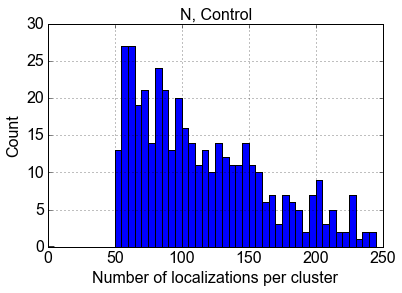

In [15]:
myBins = np.arange(0, 250, 5)
numControl.hist(bins = myBins)
plt.xlabel('Number of localizations per cluster')
plt.ylabel('Count')
plt.show()

In [16]:
numDenatured.describe()

,"N, Denatured"
count,391.000000
mean,107.409207
std,50.781799
min,51.000000
25%,68.000000
50%,93.000000
75%,134.500000
max,292.000000


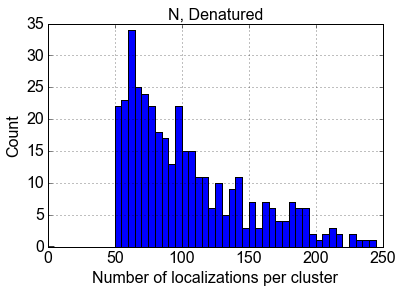

In [17]:
myBins = np.arange(0, 250, 5)
numDenatured.hist(bins = myBins)
plt.xlabel('Number of localizations per cluster')
plt.ylabel('Count')
plt.show()

### Show both histograms on top of one another

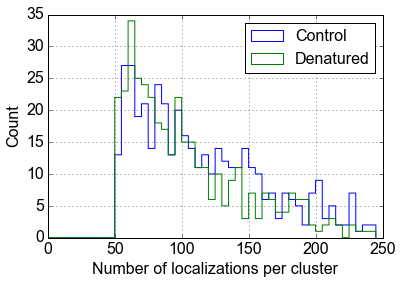

In [18]:
plt.hist(numControl['N, Control'],     bins = myBins, histtype = 'step', label = 'Control')
plt.hist(numDenatured['N, Denatured'], bins = myBins, histtype = 'step', label = 'Denatured')
plt.xlabel('Number of localizations per cluster')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()